In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 9.1 Line Plot

### A. Football

In [2]:
# A. Make a dataframe called foot using the "./international_football_results.csv" file
#    Perform a few exploratory data analysis operations before working with the data set
foot = pd.read_csv("data/datasets/international_football_results.csv")
foot.shape

(39669, 9)

In [3]:
foot.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
# We'll use the .to_datetime method and .dt.year property to set the "year" column from a string to an integer
foot['year'] = pd.to_datetime(foot['date']).dt.year

### B. Games

In [5]:
# B. Let's chart how many games occured in each year:
foot['year'].value_counts()

2008    1087
2011    1077
2004    1059
2000    1022
2001    1014
        ... 
1878       2
1874       1
1873       1
1875       1
1872       1
Name: year, Length: 147, dtype: int64

In [6]:
# The years are out of order! Fortunately, we can sort our column by its index with sort_index()
foot['year'].value_counts().sort_index()

1872       1
1873       1
1874       1
1875       1
1876       2
        ... 
2014     857
2015    1001
2016     918
2017     908
2018     390
Name: year, Length: 147, dtype: int64

<AxesSubplot:>

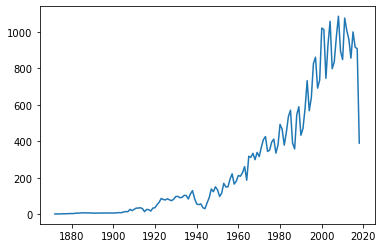

In [7]:
# Finally, we're ready to plot the change over time with .plot()
foot['year'].value_counts().sort_index().plot()

# 9.2 Bar Charts

<AxesSubplot:>

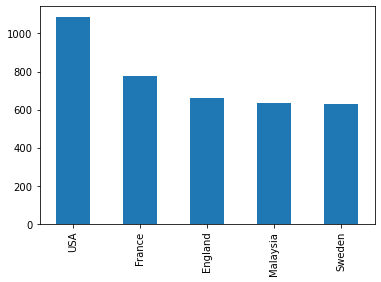

In [8]:
# A. Let's see how many games each country played, represented as a bar chart
foot['country'].value_counts().head().plot(kind="bar")

<AxesSubplot:>

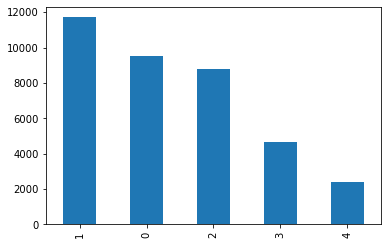

In [9]:
# B. Now let's plot the occurence of specific scores for the home team
foot['home_score'].value_counts().head().plot(kind="bar")

<AxesSubplot:>

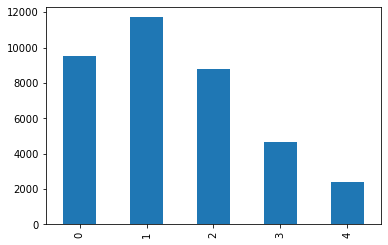

In [10]:
# C. Instead of sorting from highest to lowest value, let's sort the x axis in ascending order
foot['home_score'].value_counts().sort_index().head().plot(kind="bar")

<AxesSubplot:>

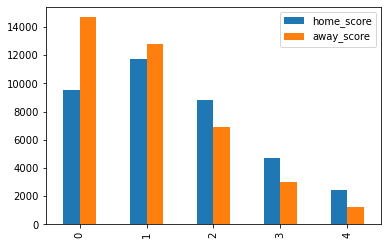

In [11]:
# BONUS: Compare the home_score and away_score value counts to analyze home field advantage
# You will need to use the .apply method to use value_counts on each column of a dataframe
foot[['home_score', 'away_score']].apply(pd.Series.value_counts).head().plot(kind="bar")

### 9.3 Histograms

In [12]:
# A. Let's start with a new dataset. Create a dataframe called choc from the './chocolate_reviews.csv' file
#    Inspect the data using some exploratory data analysis methods
choc = pd.read_csv('data/datasets/chocolate_ratings.csv')
choc.columns
pd.DataFrame(choc.dtypes, columns=["DataType"])

,DataType
Company \n(Maker-if known),object
Specific Bean Origin\nor Bar Name,object
REF,int64
Review\nDate,int64
Cocoa\nPercent,object
Company\nLocation,object
Rating,float64
Bean\nType,object
Broad Bean\nOrigin,object


<AxesSubplot:ylabel='Frequency'>

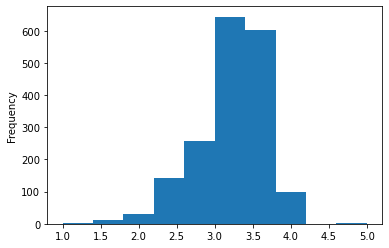

In [13]:
# B. Now, let's explore the distribution of ratings
#    i. Start by plotting the Rating column in a histogram
choc['Rating'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

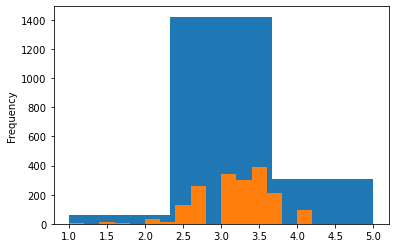

In [14]:
#    ii. Looking good! Let's see how granular we can get
#        Modify the number of bins to change how ranges are distributed
choc['Rating'].plot(kind="hist", bins=3)
choc['Rating'].plot(kind="hist", bins=20)

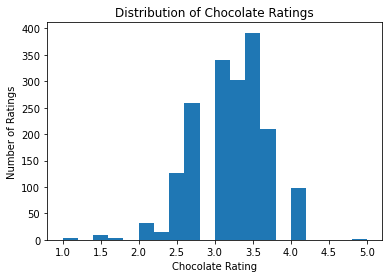

In [15]:
#    iii. Now, let's add some descriptive labels to our chart using matplotlib
choc['Rating'].plot(kind='hist', bins=20)
plt.ylabel('Number of Ratings')
plt.xlabel('Chocolate Rating')
plt.title('Distribution of Chocolate Ratings');

### 9.4 Scatter Plots

<AxesSubplot:xlabel='Review\nDate', ylabel='Rating'>

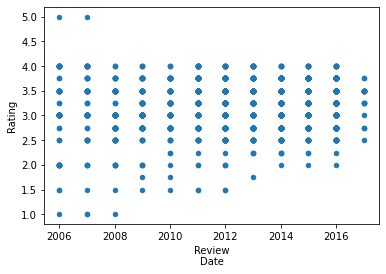

In [16]:

# A. Is there a connection between Review Date and Rating? Plot them with a scatter plot
choc.plot(kind="scatter", x="Review\nDate", y="Rating" )
# Why is this graph not so helpful?

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

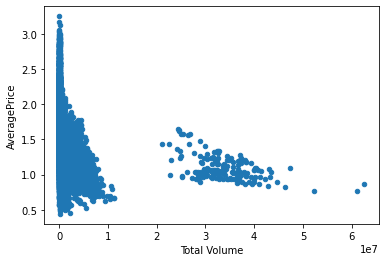

In [17]:
# B. Explore this new dataframe, then scatter plot correlation between Total Volume and AveragePrice
avo = pd.read_csv('data/datasets/avocado.csv')
avo.plot(kind='scatter', x='Total Volume', y='AveragePrice')

### 9.5 Visualizations to Hypotheses

In [18]:
# Create visualizations around any of the above datasets or our superstore datasets
# For at least one of the visualizations, attach a hypothesis or specific claim the chart supports